In [4]:
from qiskit import *
import matplotlib
import numpy as np
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import *

flip 에러를 검출하기 위한 회로 설계

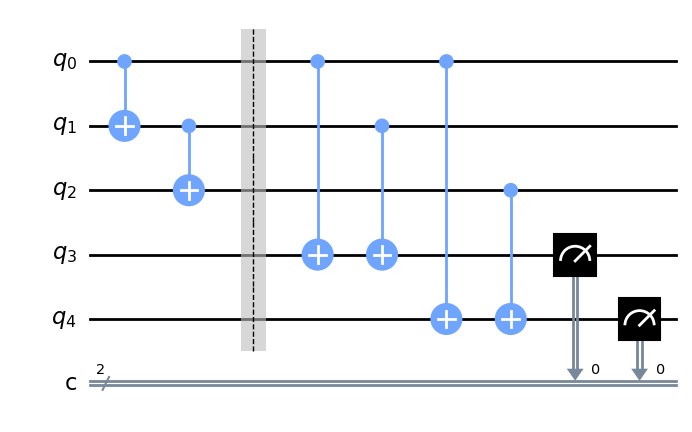

In [8]:
qc = QuantumCircuit(5,2)

#1bit logical bit를 3bit physical bit로 확장
qc.cx(0,1)
qc.cx(1,2)
qc.barrier()

#flip error를 검출하기 위해 검사

qc.cx(0,3)
qc.cx(1,3)
qc.cx(0,4)
qc.cx(2,4)

qc.measure(3,0)
qc.measure(4,0)

qc.draw(output='mpl')


phase error를 검출하기 위해 Hadamard 게이트를 이용함
H gate를 두번 적용하면 원래 형태로 돌아가는 성질을 이용

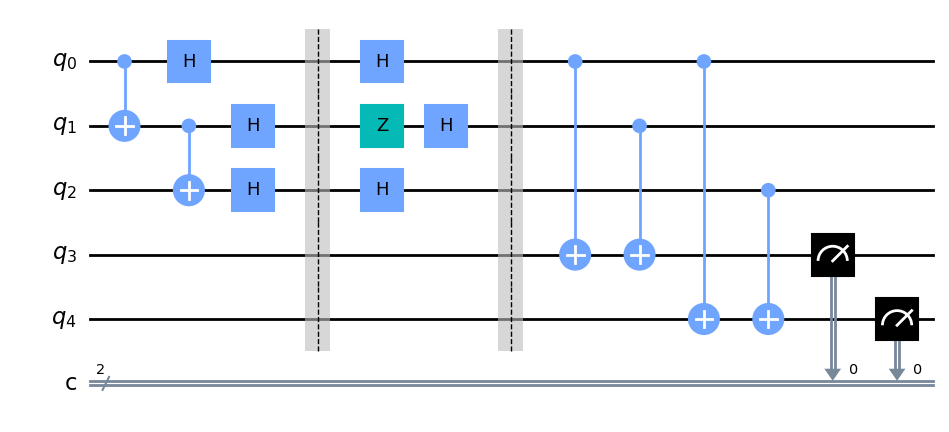

In [12]:
qc = QuantumCircuit(5,2)

#1bit logical bit를 3bit physical bit로 확장
qc.cx(0,1)
qc.cx(1,2)

#phase error가 발생될 것 같은 위치에 Hadamard gate를 적용
qc.h(0)
qc.h(1)
qc.h(2)
qc.barrier()

#2번째 qubit에 z gate가 적용됬다고 가정
qc.z(1)

#다시 h gate를 적용하여 에러 검출
qc.h(0)
qc.h(1)
qc.h(2)
qc.barrier()

#flip error를 검출하기 위해 검사

qc.cx(0,3)
qc.cx(1,3)
qc.cx(0,4)
qc.cx(2,4)

qc.measure(3,0)
qc.measure(4,0)

#에러가 발생했기 때문에 parity측정 시 어느 큐빗에서 phase flip이 일어났는지 알 수 있음

qc.draw(output='mpl')


shor code

|+++>이나 |---> 상태의 3bit qubit상태에서 |0>과 |1>도 flip이 일어날 수 있기 때문에 
다시 3비트로 확장하여 (|000> or |111>) 총 9개의 비트를 이용하여 오류를 검출하는 코드

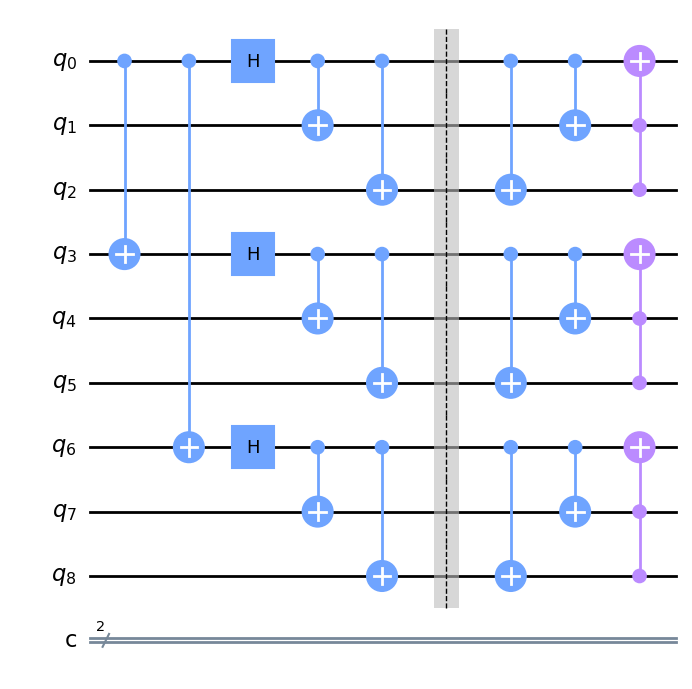

In [21]:
qc = QuantumCircuit(9,2)

qc.cx(0,3)
qc.cx(0,6)
qc.h(0)
qc.h(3)
qc.h(6)

#각각에 대해 다시 확장
qc.cx(0,1)
qc.cx(0,2)

qc.cx(3,4)
qc.cx(3,5)

qc.cx(6,7)
qc.cx(6,8)
qc.barrier()

#phase 검출을 위해 n-qubit tofolli gate를 사용하지 않음 더 간단한 형태 존재
#cx를 통해 2,3번째 큐빗을 검사하고 둘다 오류가 발생했다면 ccx를 통해 첫 큐빗을 보정
#concatenation code라고 부름
qc.cx(0,2)
qc.cx(0,1)
qc.ccx(2,1,0)

qc.cx(3,5)
qc.cx(3,4)
qc.ccx(5,4,3)

qc.cx(6,8)
qc.cx(6,7)
qc.ccx(8,7,6)


qc.draw(output='mpl')